In [4]:
import datetime as dt
import glob
import re
import dateutil
import matplotlib.pyplot as plt
import os
import numpy as np
import collections as coll
import pandas as pd
%matplotlib inline  

In [5]:
%load_ext autoreload
%autoreload 2
import latexml_err_mess_stats as err

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
lst_error_files = glob.glob('../test_latexml/*')
err.summary(lst_error_files)
len(lst_error_files)

Success Fail Fatal Maxed Timed Died no_tex
  120.0 18.0   4.0  14.0   3.0  0.0    2.0
Counter({None: 54, 'ascii': 45, 'utf-8': 21, 'ISO-8859-1': 8, 'None': 7, 'Windows-1252': 5})
NANs 2
(0.803, 151.625] 85
(151.625, 301.25] 39
(301.25, 450.875] 10
(750.125, 899.75] 1
(1049.375, 1199.0] 3


140

In [16]:
p_lst = list(map(err.ParseLaTeXMLLog, lst_error_files))
p_times = [p.time_secs for p in p_lst]
Cut,bins = pd.cut(p_times, 8, retbins=True)
count = coll.Counter(Cut)
#for c in sorted(list(count)):
#    print(c, count[c])
del count[np.nan]
count
del count[np.nan]
count

Counter({Interval(151.625, 301.25, closed='right'): 39,
         Interval(0.803, 151.625, closed='right'): 85,
         Interval(301.25, 450.875, closed='right'): 10,
         Interval(750.125, 899.75, closed='right'): 1,
         Interval(1049.375, 1199.0, closed='right'): 3})

In [54]:
bins

array([  0.745,  64.75 , 128.5  , 192.25 , 256.   ])

In [50]:
for c in Cut:
    print(c.)

(0.745, 16.938]
(48.812, 64.75]
(32.875, 48.812]
(16.938, 32.875]
(32.875, 48.812]
(16.938, 32.875]
(32.875, 48.812]
(16.938, 32.875]
(32.875, 48.812]
(16.938, 32.875]
(0.745, 16.938]
(16.938, 32.875]
(16.938, 32.875]
(16.938, 32.875]
(0.745, 16.938]
(16.938, 32.875]
(48.812, 64.75]
(16.938, 32.875]
(48.812, 64.75]
(48.812, 64.75]
(32.875, 48.812]
(0.745, 16.938]
(64.75, 80.688]
(16.938, 32.875]
(16.938, 32.875]
(0.745, 16.938]
(0.745, 16.938]
(32.875, 48.812]
(240.062, 256.0]
(16.938, 32.875]
(32.875, 48.812]
(32.875, 48.812]
(16.938, 32.875]
(16.938, 32.875]
(16.938, 32.875]
(16.938, 32.875]
(80.688, 96.625]
(16.938, 32.875]
(16.938, 32.875]
(32.875, 48.812]
(48.812, 64.75]
(0.745, 16.938]
(0.745, 16.938]
(48.812, 64.75]
(16.938, 32.875]
(16.938, 32.875]
(16.938, 32.875]
(0.745, 16.938]
(48.812, 64.75]
(0.745, 16.938]
(0.745, 16.938]
(16.938, 32.875]
(16.938, 32.875]
(16.938, 32.875]
(64.75, 80.688]
(16.938, 32.875]
(16.938, 32.875]
(112.562, 128.5]
(16.938, 32.875]
(32.875, 48.812]


In [202]:
encoding_lst = []
for l in lst_error_files:
    p = err.ParseLaTeXMLLog(l)
    if p.fatal_errors:
        print('fe: %s ee: %s fn: %s'%(p.fatal_errors, p.errors, p.filename))
        print(p.commentary()[-1])
        G = re.search('Finished in less than (\d+) seconds', p.commentary()[-1]).group(1)
        
        print(G)
        print('-----------------')

fe: 1 ee: 101 fn: data/problem_files_starting_1703/1703.01379/latexml_errors_mess.txt
Finished in less than 1200 seconds

1200
-----------------
fe: 1 ee: 101 fn: data/problem_files_starting_1703/1703.01398/latexml_errors_mess.txt
Finished in less than 1200 seconds

1200
-----------------
fe: 1 ee: 101 fn: data/problem_files_starting_1703/1703.01376/latexml_errors_mess.txt
Finished in less than 1200 seconds

1200
-----------------


In [151]:
I = lst_error_files.index(list(filter(lambda s: '1703.01352' in s, lst_error_files ))[0])
with open(lst_error_files[20], 'r') as err_file:
    err = err_file.read()
print(re.search('\nConversion complete:(.*)', err).group(0))    
print(re.search('\nConversion complete: (No obvious problems\.)?(\d+ warnings?[;\.] ?)?(\d+ errors?[;\.] ?)?(\d+ fatal errors?[;\.] ?)?(\d+ undefined macros?\[[\*\@\{\}\\\\,\w\. ]+\][;\.] ?)?(\d+ missing files?\[[,\w\. ]+\])?.*\n', err).groups())



Conversion complete: 8 warnings; 13 errors; 10 undefined macros[\authorcontributions, \doi, \authordeclaration, \significancestatement, \templatetype, \ifthenelse, \correspondingauthor, \dates, \leadauthor, \verticaladjustment]; 7 missing files[t1enc.def, pnas-new.cls, babel.sty, tikz.sty, algpseudocode.sty, keyval.sty, algorithm.sty].
(None, '8 warnings; ', '13 errors; ', None, '10 undefined macros[\\authorcontributions, \\doi, \\authordeclaration, \\significancestatement, \\templatetype, \\ifthenelse, \\correspondingauthor, \\dates, \\leadauthor, \\verticaladjustment]; ', None)


In [183]:
os.path.split(lst_error_files[3])

('data/problem_files_starting_1703/1703.01389', 'latexml_errors_mess.txt')

In [4]:
def time_from_latexml_log(f):
    '''
   return time in seconds that a latexml process spent as it appears on the logs
   time is returned in seconds
    '''
    with open(f,'r') as open_file:
        file_content = open_file.read()
        start = re.search('\nprocessing started (.*)\n', file_content).group(1)
        finish = re.search('\nprocessing finished (.*)\n', file_content).group(1)
        d1 = dateutil.parser.parse(start)
        d2 = dateutil.parser.parse(finish)
    return (d2-d1).seconds

time_from_latexml_log('data/nanopterons2/latexml_errors_mess.txt')/60.0

1.8833333333333333

In [4]:
duration_lst = []
for f in lst_error_files:
    with open(f,'r') as open_file:
        file_content = open_file.read()
        start = re.search('\nprocessing started (.*)\n', file_content).group(1)
        finish = re.search('\nprocessing finished (.*)\n', file_content).group(1)
        d1 = dateutil.parser.parse(start)
        d2 = dateutil.parser.parse(finish)
        duration_lst.append((d2-d1).seconds/60.0)

(array([79., 43.,  9.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  3.]),
 array([1.66666667e-02, 6.82222222e-01, 1.34777778e+00, 2.01333333e+00,
        2.67888889e+00, 3.34444444e+00, 4.01000000e+00, 4.67555556e+00,
        5.34111111e+00, 6.00666667e+00, 6.67222222e+00, 7.33777778e+00,
        8.00333333e+00, 8.66888889e+00, 9.33444444e+00, 1.00000000e+01,
        1.06655556e+01, 1.13311111e+01, 1.19966667e+01, 1.26622222e+01,
        1.33277778e+01, 1.39933333e+01, 1.46588889e+01, 1.53244444e+01,
        1.59900000e+01, 1.66555556e+01, 1.73211111e+01, 1.79866667e+01,
        1.86522222e+01, 1.93177778e+01, 1.99833333e+01]),
 <a list of 30 Patch objects>)

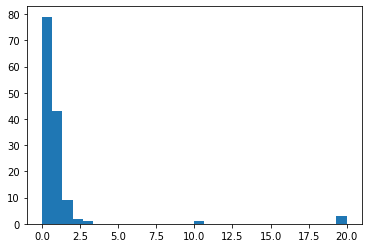

In [5]:
plt.hist(duration_lst, bins=30)